In [1]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
!pip install levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.9 MB/s eta 0:00:00


## Word Segmentation

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Number of chants: 7031
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:The SVC model was trained with 4922 training data and 4922 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2499 , Last feature occurences: 79
INFO:root:From model approach - reduced accuracy: 97.48%, reduced f1: 97.48%


------------------------------- Train Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 98.21%
			 f1: 98.21%

		 NB accuracy and f1
			 accuracy: 97.18%
			 f1: 97.18%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 29797 unique segments

		 Average Segment Length
			 avgerage: 6.98 tones in one segment

		 Melody Justified With Words
			 words justification: 100.00% of segments
			 segments justification: 100.00% of segments
			 average justification: 100.00% of segments

		 Weighted Top Mode Frequency
			 wtmf: 72.48% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.54 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.62 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


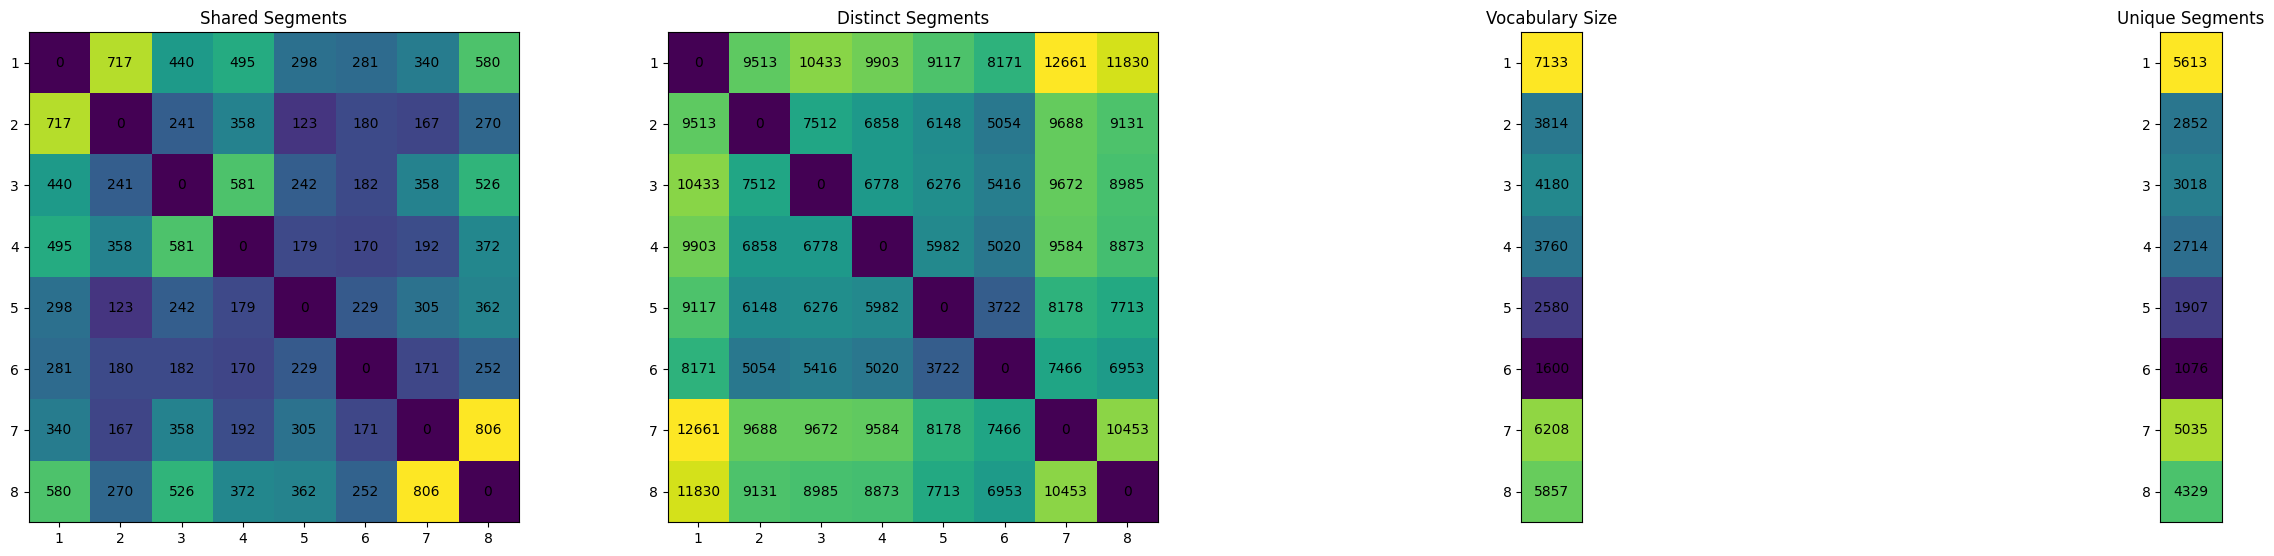

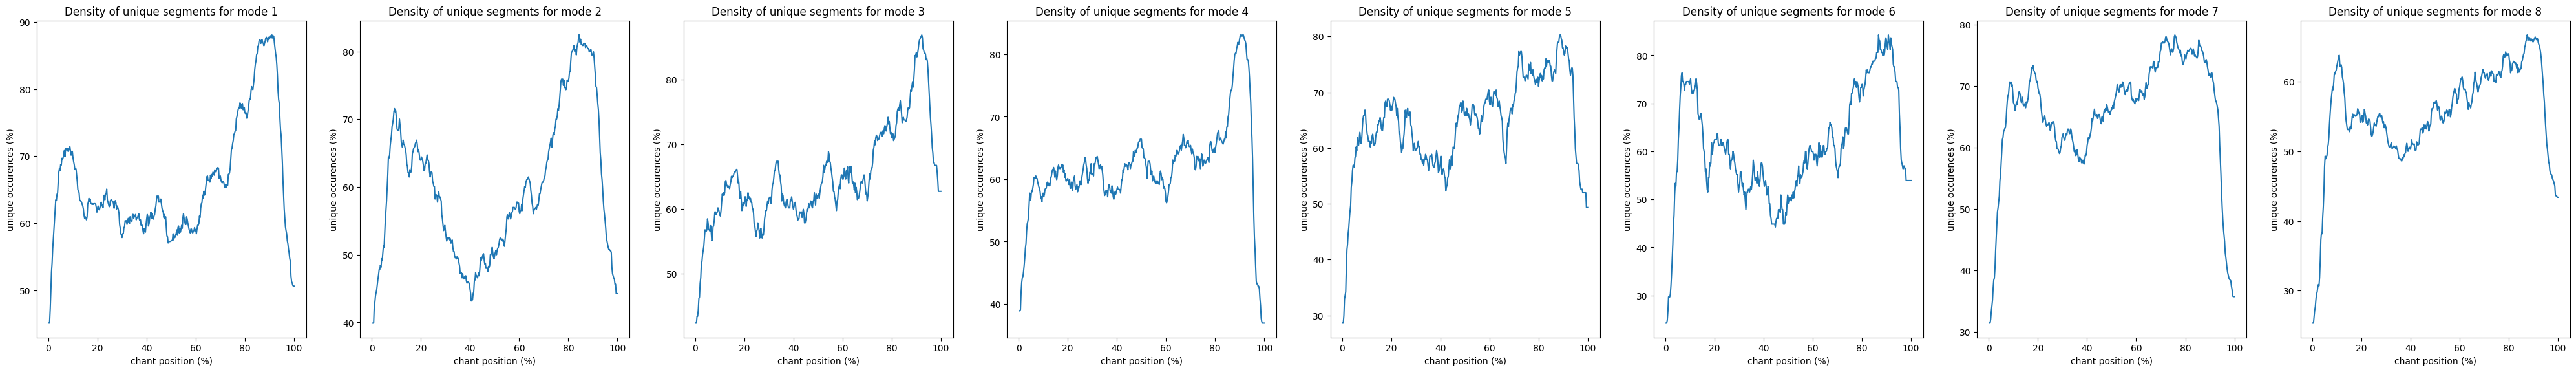

-------------------------------------------------------
--------------------------------------------------------------------------


INFO:root:The SVC model was trained with 4922 training data and 2109 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2499 , Last feature occurences: 79
INFO:root:From model approach - reduced accuracy: 87.81%, reduced f1: 87.78%


------------------------------- Test Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 91.70%
			 f1: 91.67%

		 NB accuracy and f1
			 accuracy: 90.04%
			 f1: 90.13%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 16191 unique segments

		 Average Segment Length
			 avgerage: 6.90 tones in one segment

		 Melody Justified With Phrases
			 mjww: -100.00% of segments

		 Melody Justified With Words
			 words justification: 100.00% of segments
			 segments justification: 100.00% of segments
			 average justification: 100.00% of segments

		 Weighted Top Mode Frequency
			 wtmf: 73.72% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.56 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.77 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


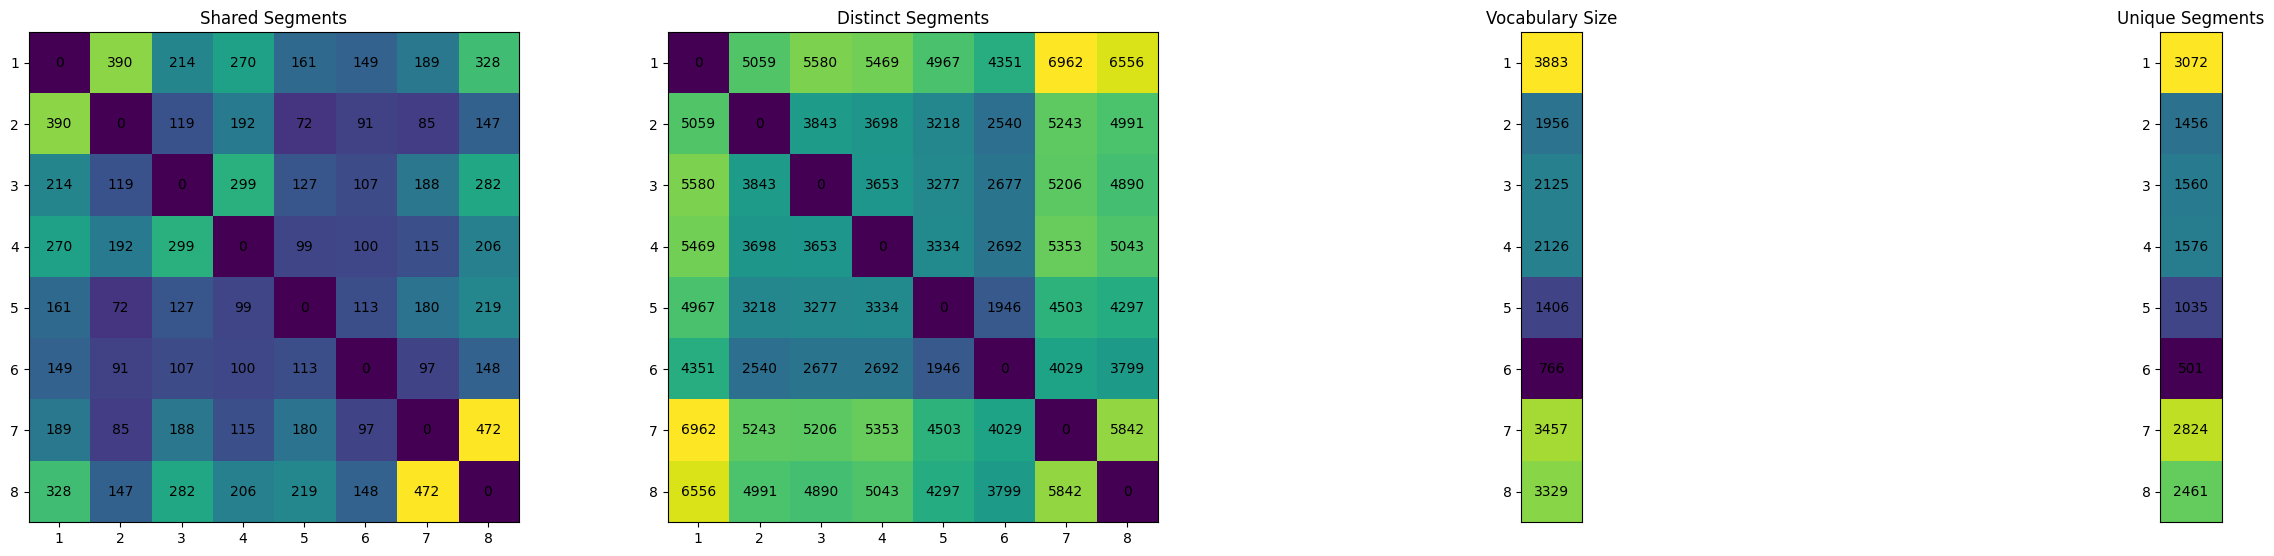

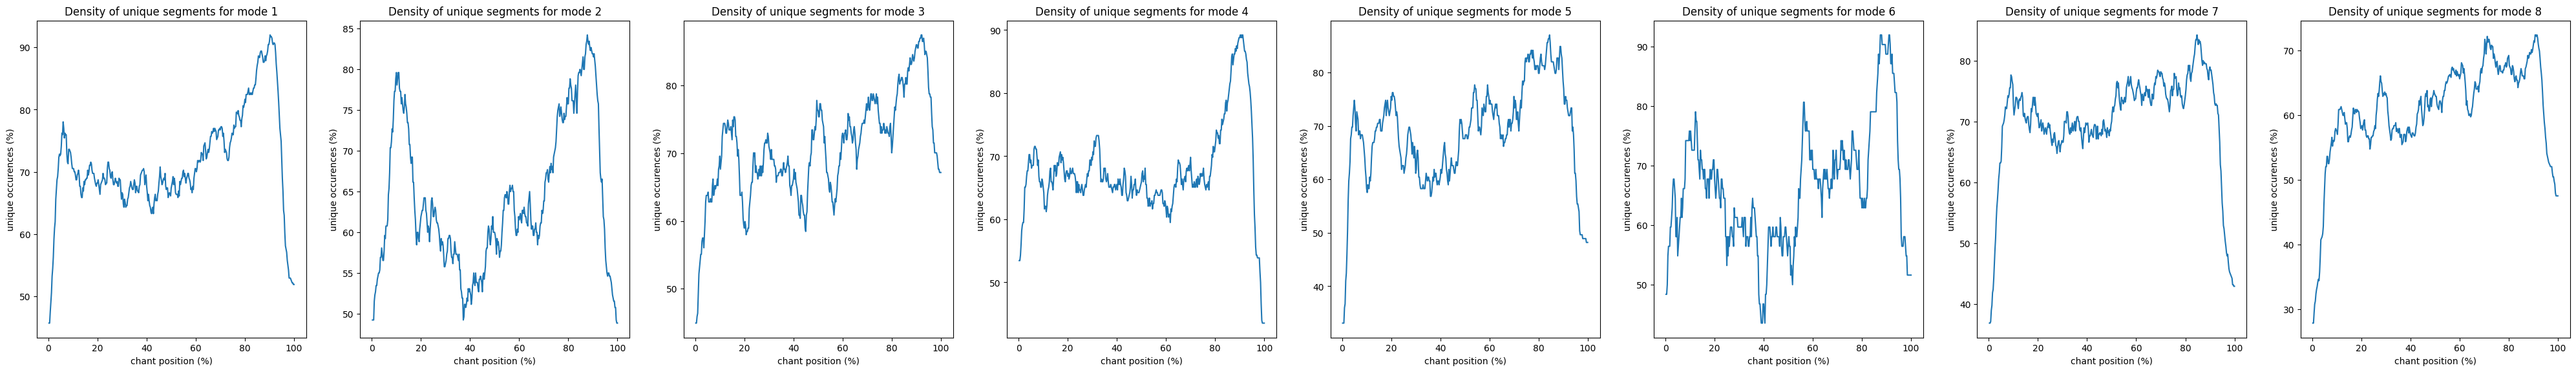

-------------------------------------------------------
--------------------------------------------------------------------------
Top selected melodies - from model: ['f', 'g', 'd', 'h', 'k', 'l', 'ghg', 'hg', 'gh', 'c', 'ghjhghhg', 'fgh', 'cd', 'fghg', 'gf', 'ghgg', 'fg', 'df', 'ghkhghhg', 'defefed', 'fh', 'e', 'hk', 'kk', 'fe', 'gg', 'defedeed', 'fghgfggf', 'egfffe', 'gghjhghhg', 'dd', 'ff', 'jk', 'kl', 'cdf', 'dc', 'kj', 'hf', 'lk', 'klk', 'j', 'gghkhghhg', 'ghk', 'dfghg', 'ed', 'hG', 'kh', 'ef', 'fhk', 'khjkjhghhg', 'dfd', 'defedefd', 'fE', 'lml', 'gF', 'fghh', 'hh', 'gghg', 'kjk', 'kklk', 'hghgfggf', 'fd', 'ghh', 'hhg', 'ghkhjhg', 'efg', 'ghgh', 'fed', 'dC', 'ggh', 'fefg', 'fef', 'fgefedeed', 'll', 'fgff', 'a', 'de', 'ffghgfggf', 'lm', 'hgfg', 'hgh', 'ddefedeed', 'kJ', 'dg', 'fghgg', 'klkkh', 'gghk', 'fff', 'hhghkghggf', 'egeffe', 'fghghg', 'ffe', 'hghgf', 'acdfd', 'cdd', 'kkj', 'cdfd', 'jklkjhjkjhghjhghhg', 'dfdd', 'dh']


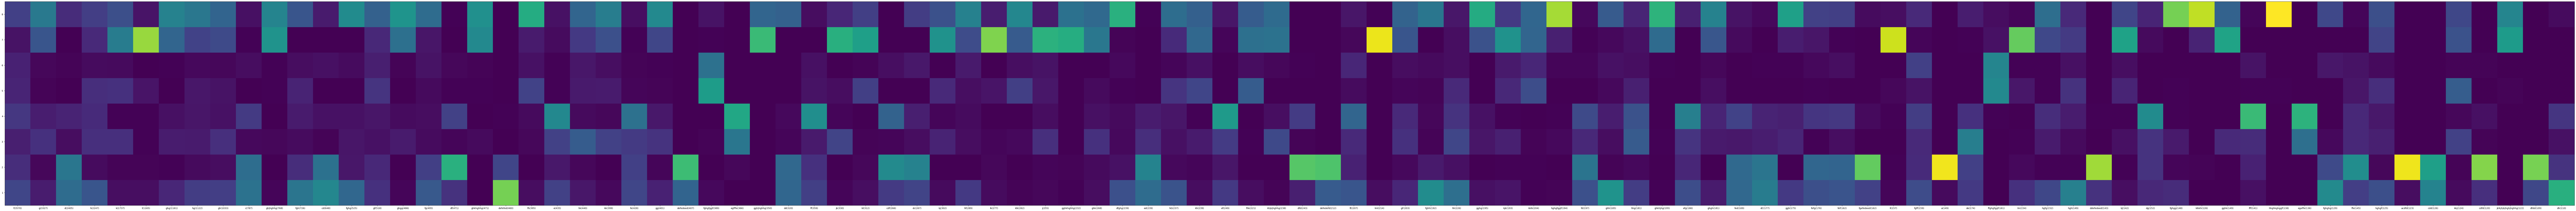

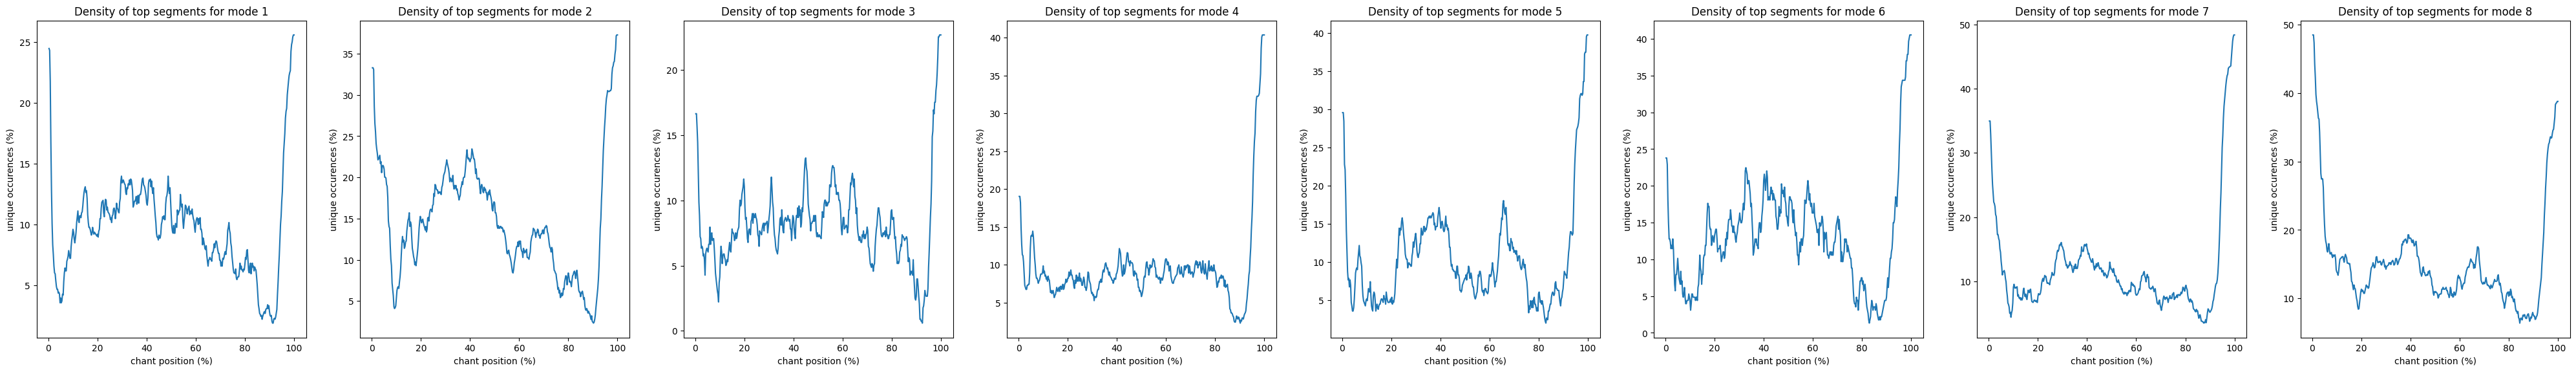



------------------------- Train + Test data charts ----------------------------
------------- Modes Vocabulary Statistics -------------


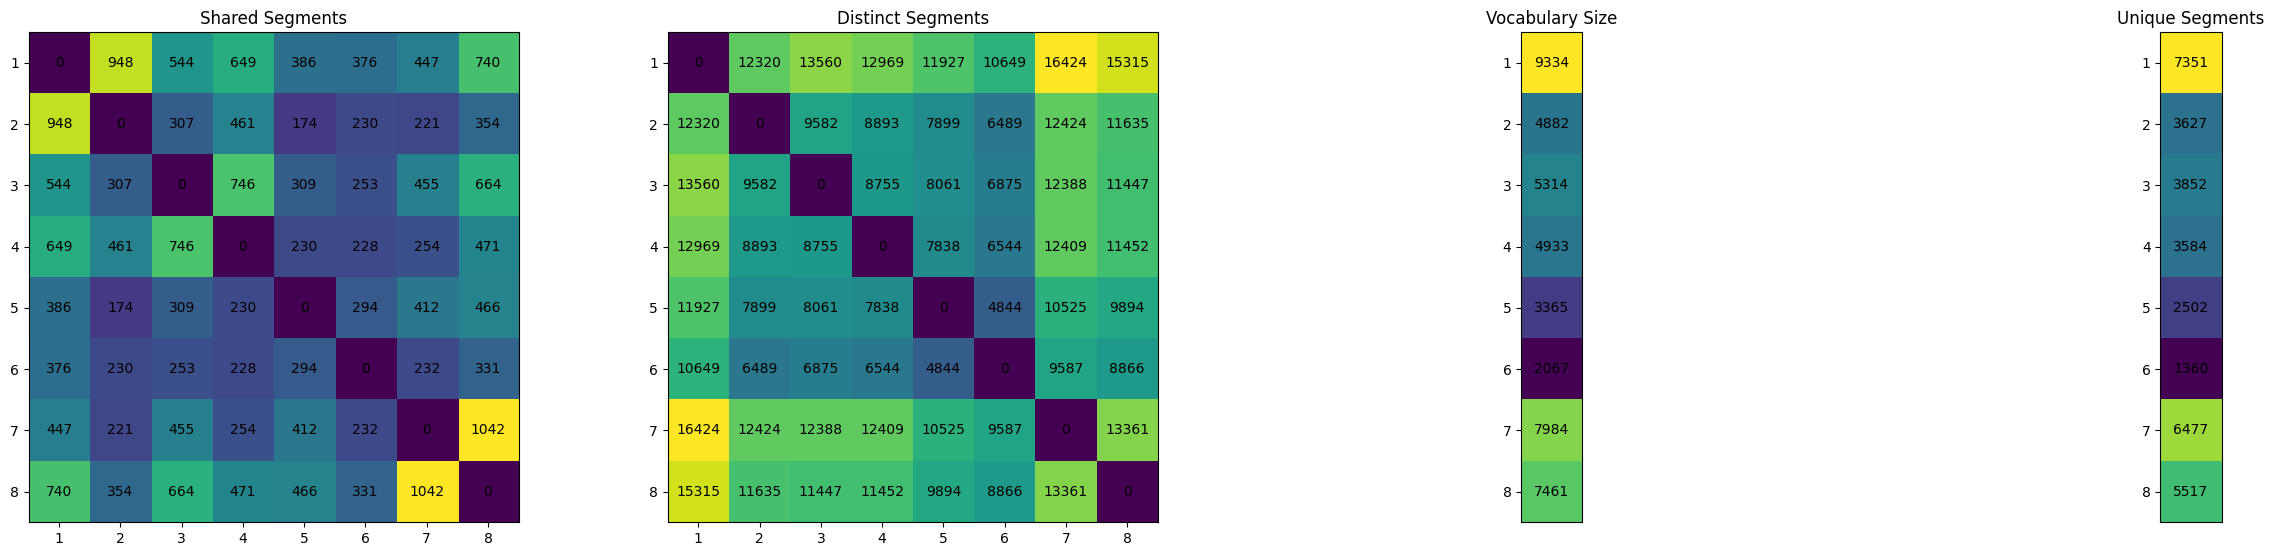

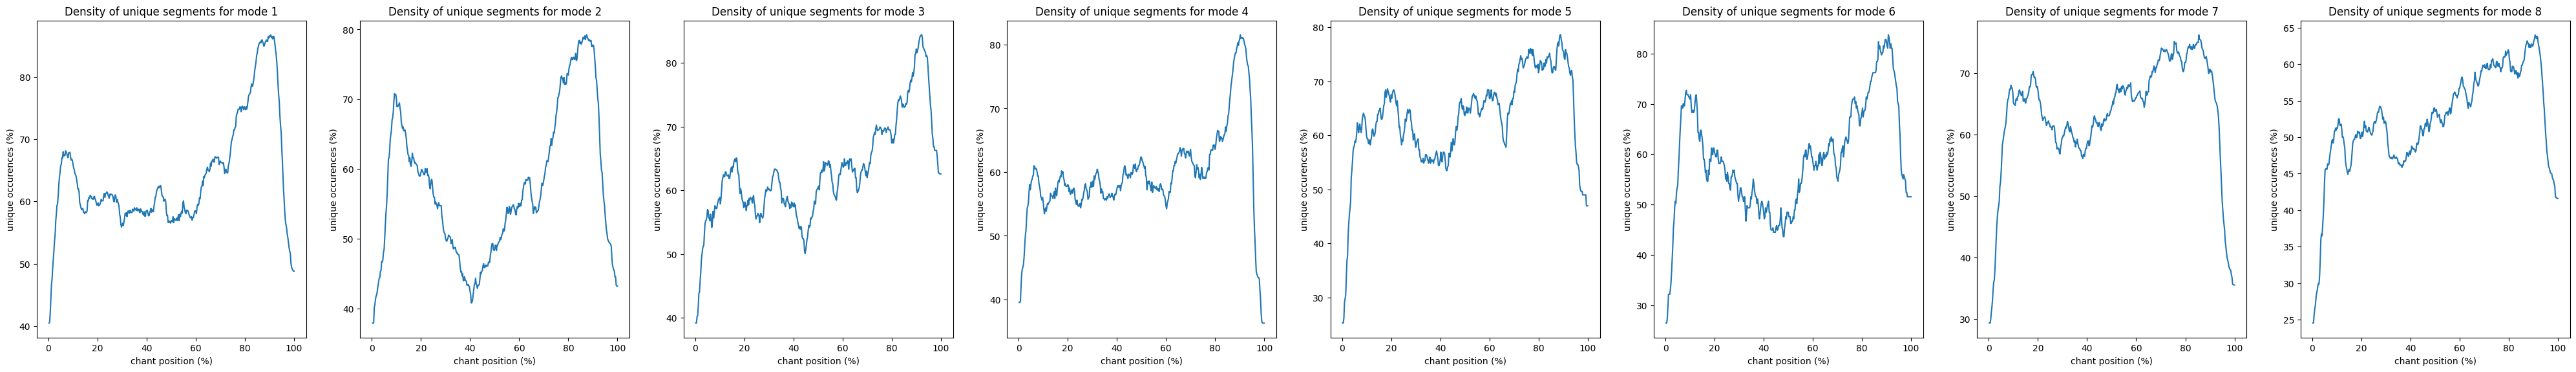

-------------------------------------------------------
------------------------------------------------------------------------


In [3]:
from src.utils.loader import prepare_dataset, load_word_segmentations
from src.eval.pipelines import evaluation_pipeline


# Get Data
_, y = prepare_dataset()
y_train, y_test = y[:4922].tolist(), y[4922:].tolist()
word_segmentations = load_word_segmentations()
train_segmentation, test_segmentation = word_segmentations[:4922], word_segmentations[4922:]
# Evaluate model
bacor_model = evaluation_pipeline(
    train_segmentation, y_train, test_segmentation, y_test,
    max_features_from_model = 100, include_additative = False, fe_occurence_coef=10)

## Syllable Segmentation

INFO:root:Number of chants: 7031
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:The SVC model was trained with 4922 training data and 4922 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 19708 , Last feature occurences: 224
INFO:root:From model approach - reduced accuracy: 98.29%, reduced f1: 98.29%


------------------------------- Train Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 95.84%
			 f1: 95.83%

		 NB accuracy and f1
			 accuracy: 98.42%
			 f1: 98.42%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 12604 unique segments

		 Average Segment Length
			 avgerage: 2.94 tones in one segment

		 Melody Justified With Words
			 words justification: 42.09% of segments
			 segments justification: 100.00% of segments
			 average justification: 71.05% of segments

		 Weighted Top Mode Frequency
			 wtmf: 49.58% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 9.17 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.58 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


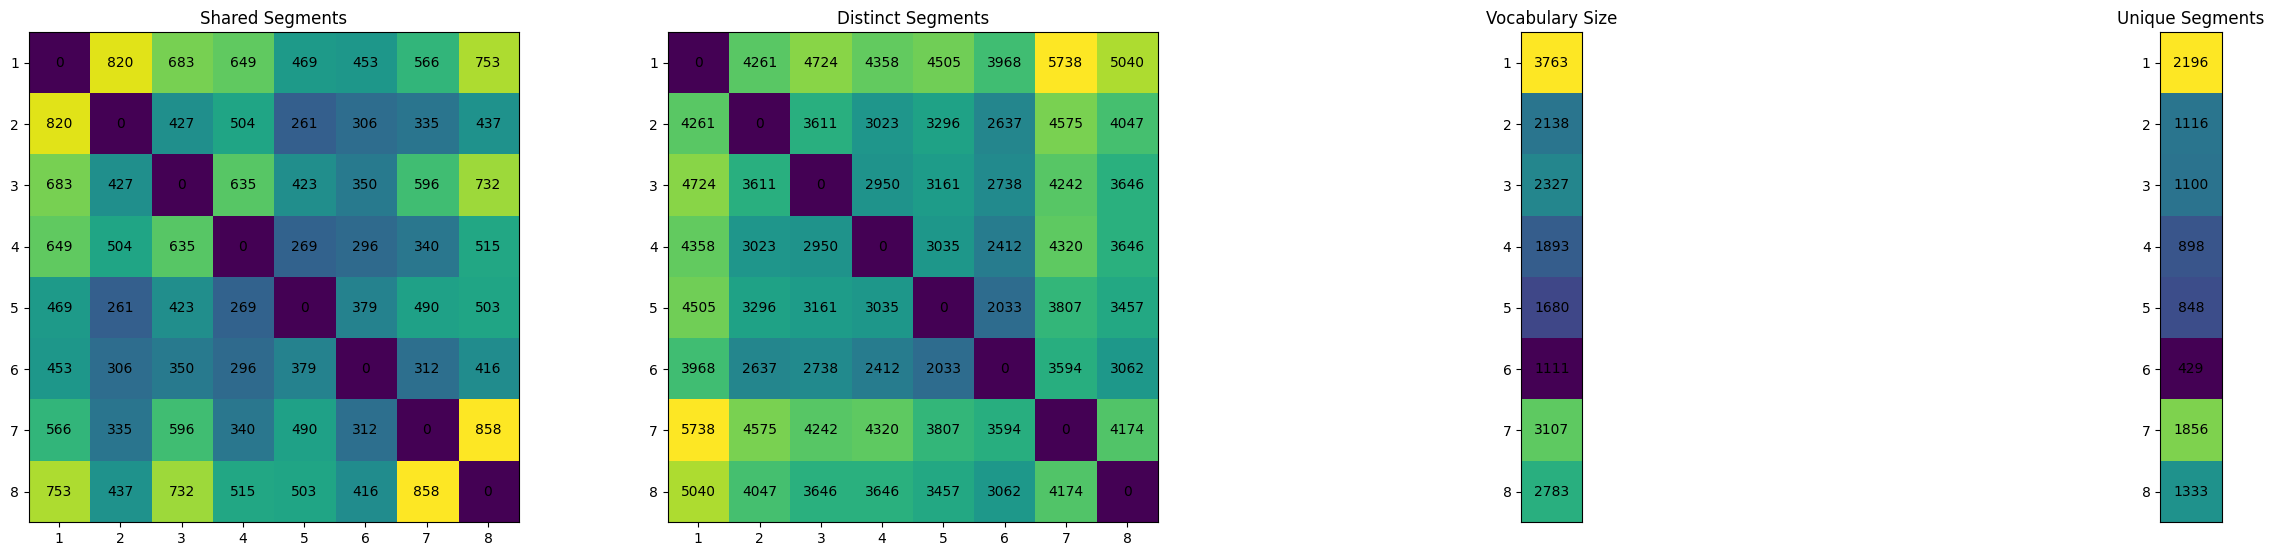

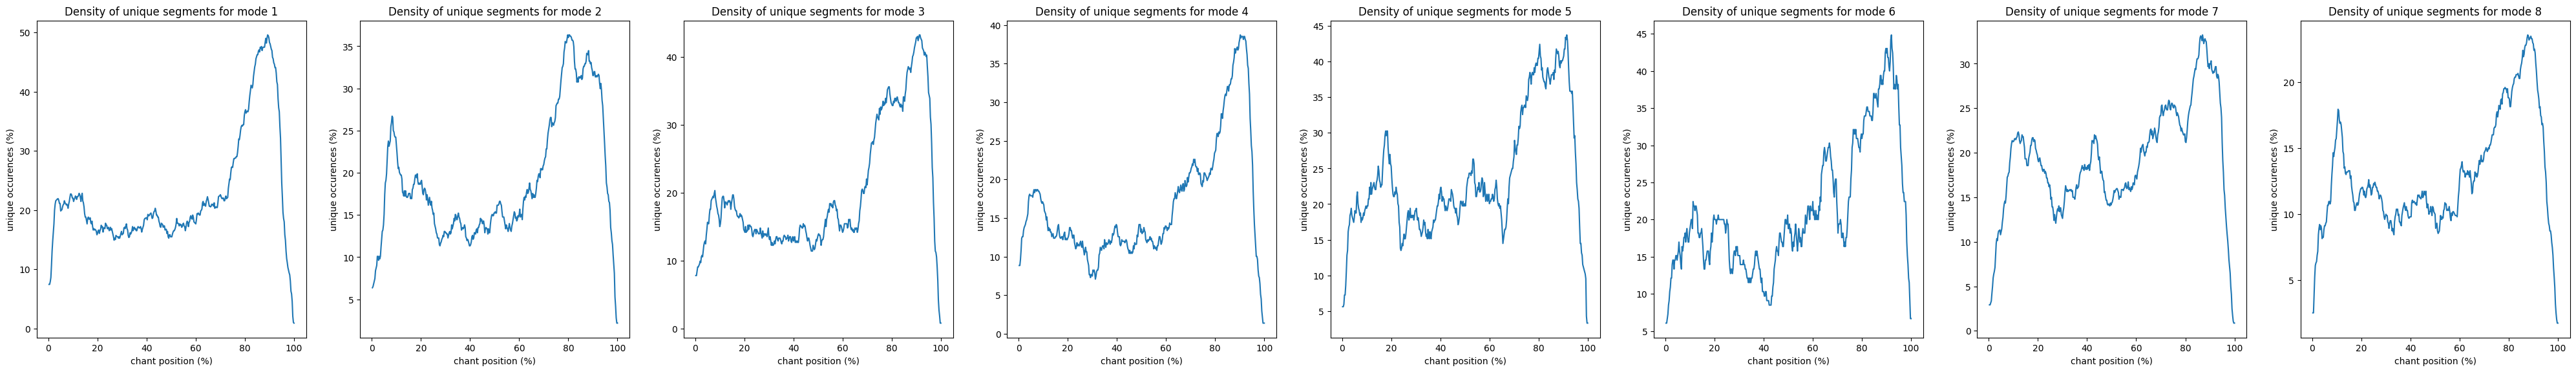

-------------------------------------------------------
--------------------------------------------------------------------------


INFO:root:The SVC model was trained with 4922 training data and 2109 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 19708 , Last feature occurences: 224
INFO:root:From model approach - reduced accuracy: 93.36%, reduced f1: 93.35%


------------------------------- Test Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 92.70%
			 f1: 92.68%

		 NB accuracy and f1
			 accuracy: 89.81%
			 f1: 89.95%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 7342 unique segments

		 Average Segment Length
			 avgerage: 2.92 tones in one segment

		 Melody Justified With Phrases
			 mjww: -100.00% of segments

		 Melody Justified With Words
			 words justification: 42.25% of segments
			 segments justification: 100.00% of segments
			 average justification: 71.12% of segments

		 Weighted Top Mode Frequency
			 wtmf: 49.75% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 9.22 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.65 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


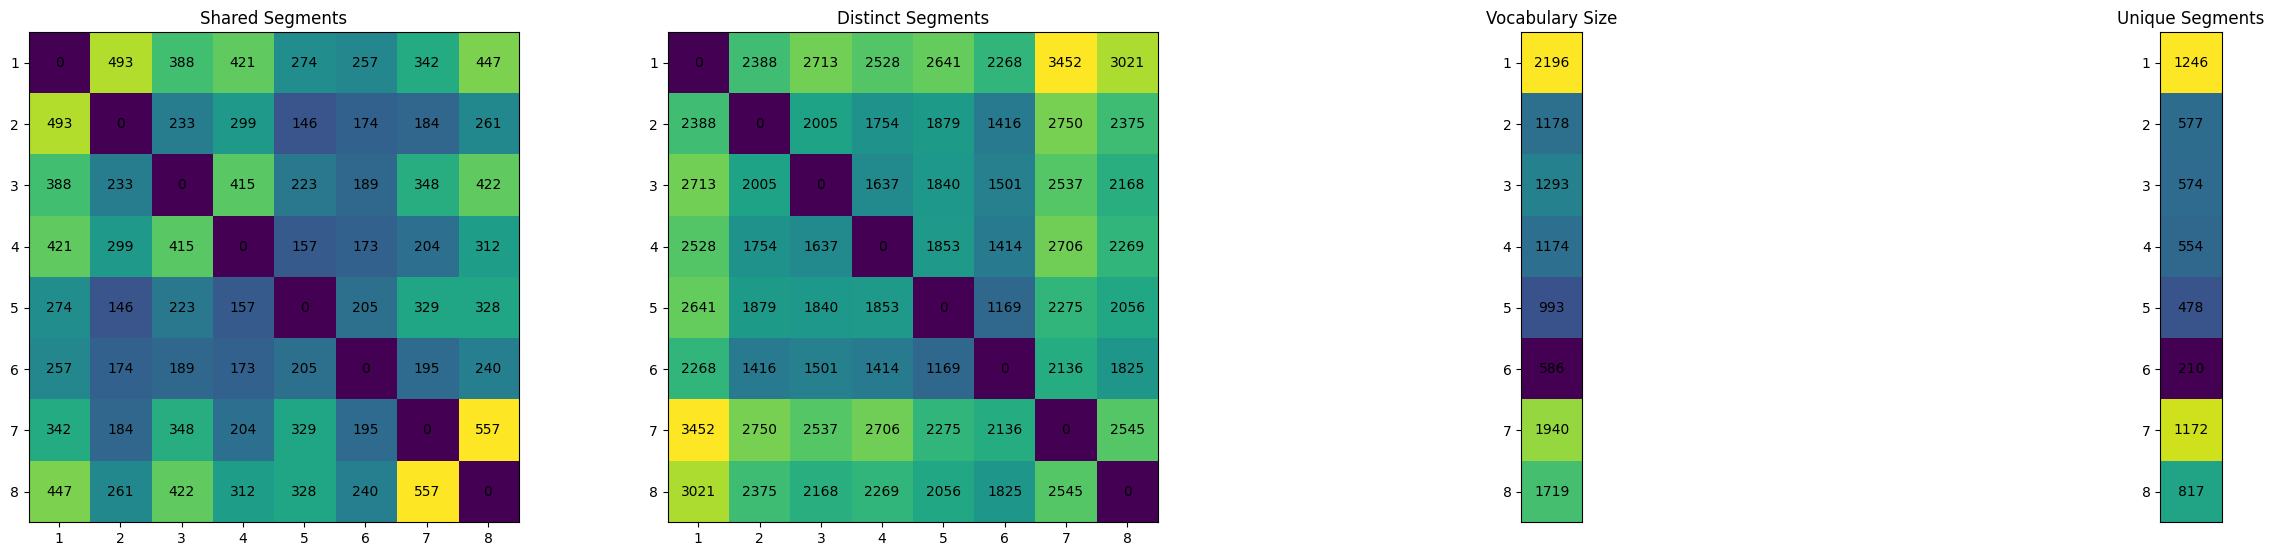

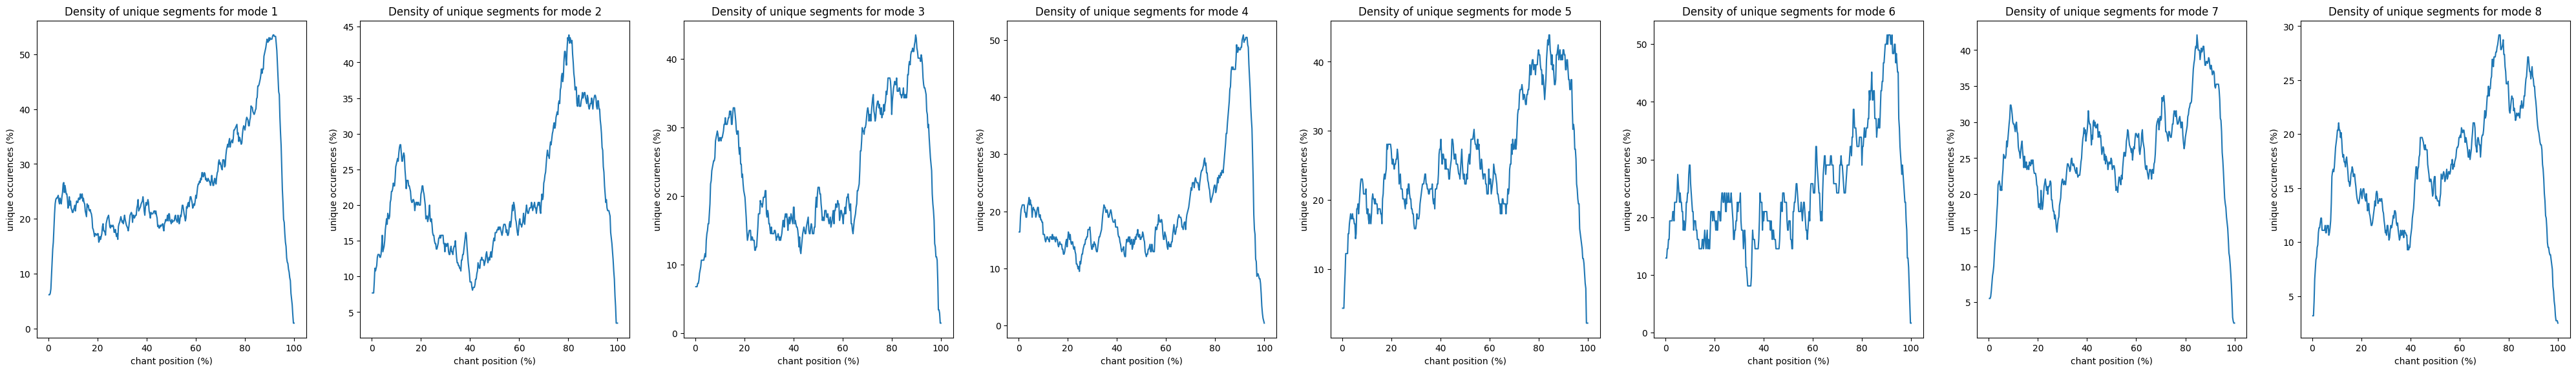

-------------------------------------------------------
--------------------------------------------------------------------------
Top selected melodies - from model: ['g', 'h', 'f', 'd', 'k', 'hg', 'l', 'gh', 'fe', 'gf', 'ed', 'fg', 'hk', 'kl', 'kj', 'e', 'fgh', 'c', 'cd', 'dc', 'df', 'ghg', 'ghjhgh', 'j', 'fd', 'lk', 'ef', 'ghkhgh', 'defef', 'klk', 'ml', 'defede', 'lm', 'kh', 'egff', 'hG', 'jk', 'jklkjhjkjh', 'jh', 'ghk', 'de', 'fghgfg', 'm', 'fE', 'n', 'i', 'fgf', 'kk', 'gF', 'ghgf', 'fef', 'ih', 'a', 'fed', 'hj', 'hf', 'fh', 'dC', 'jkl', 'ghkghggf', 'ff', 'ghkhj', 'cdf', 'kJ', 'klm', 'hghgfg', 'gfghgh', 'kjh', 'gH', 'hgh', 'ghkjhjkjh', 'hgf', 'efg', 'dg', 'gl', 'dfddc', 'hkh', 'defedc', 'hggf', 'gfg', 'fghg', 'fhk', 'ghgh', 'ddc', 'egef', 'fefgf', 'hhg', 'hi', 'kkl', 'lK', 'kkj', 'egf', 'khjkjhgh', 'gkj', 'kjkjhg', 'hgge', 'dh', 'ljklkjhjkjh', 'ghG', 'gffe']


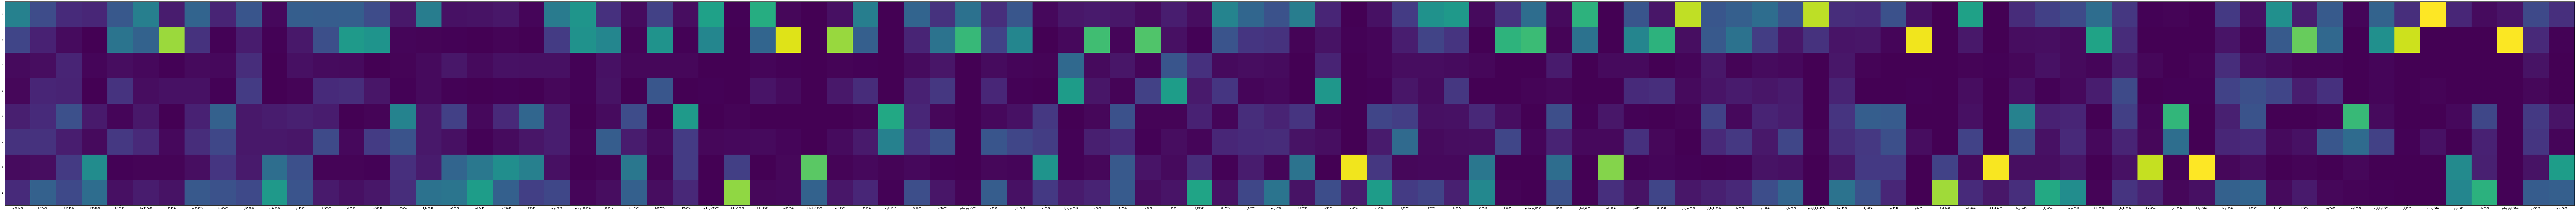

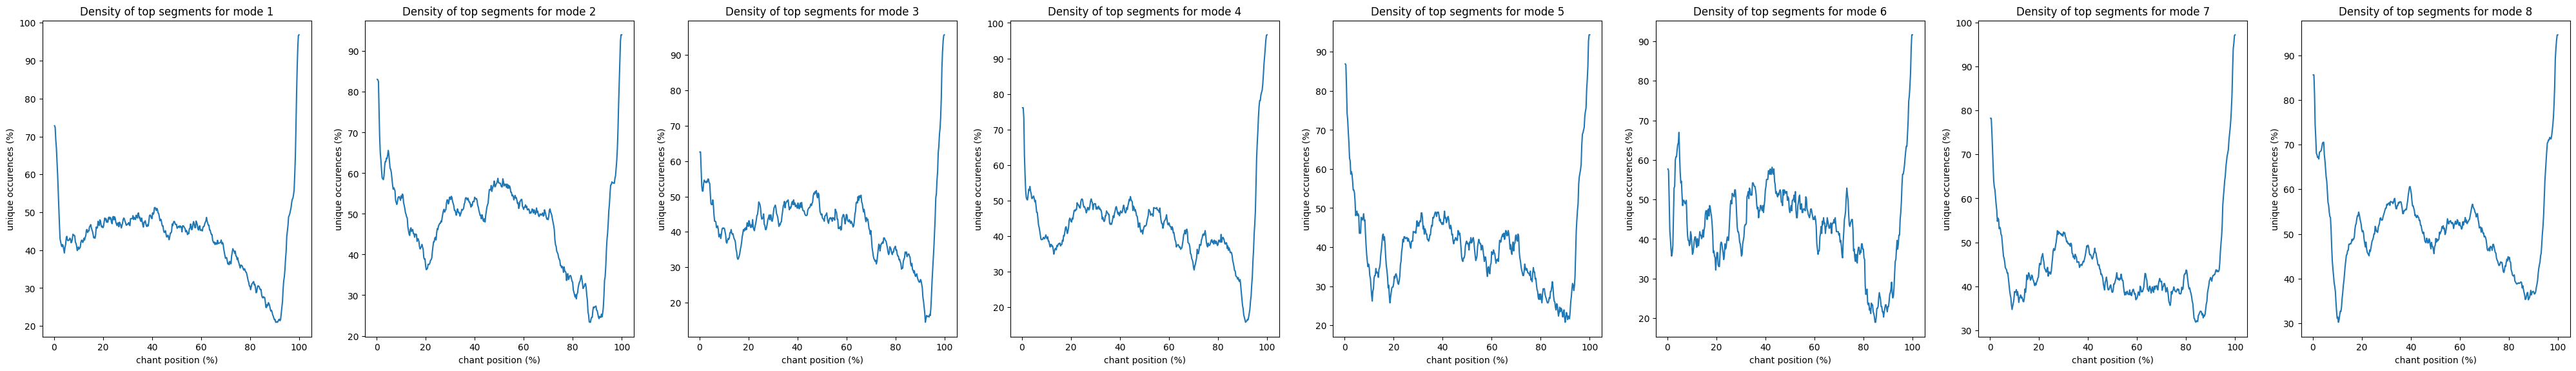



------------------------- Train + Test data charts ----------------------------
------------- Modes Vocabulary Statistics -------------


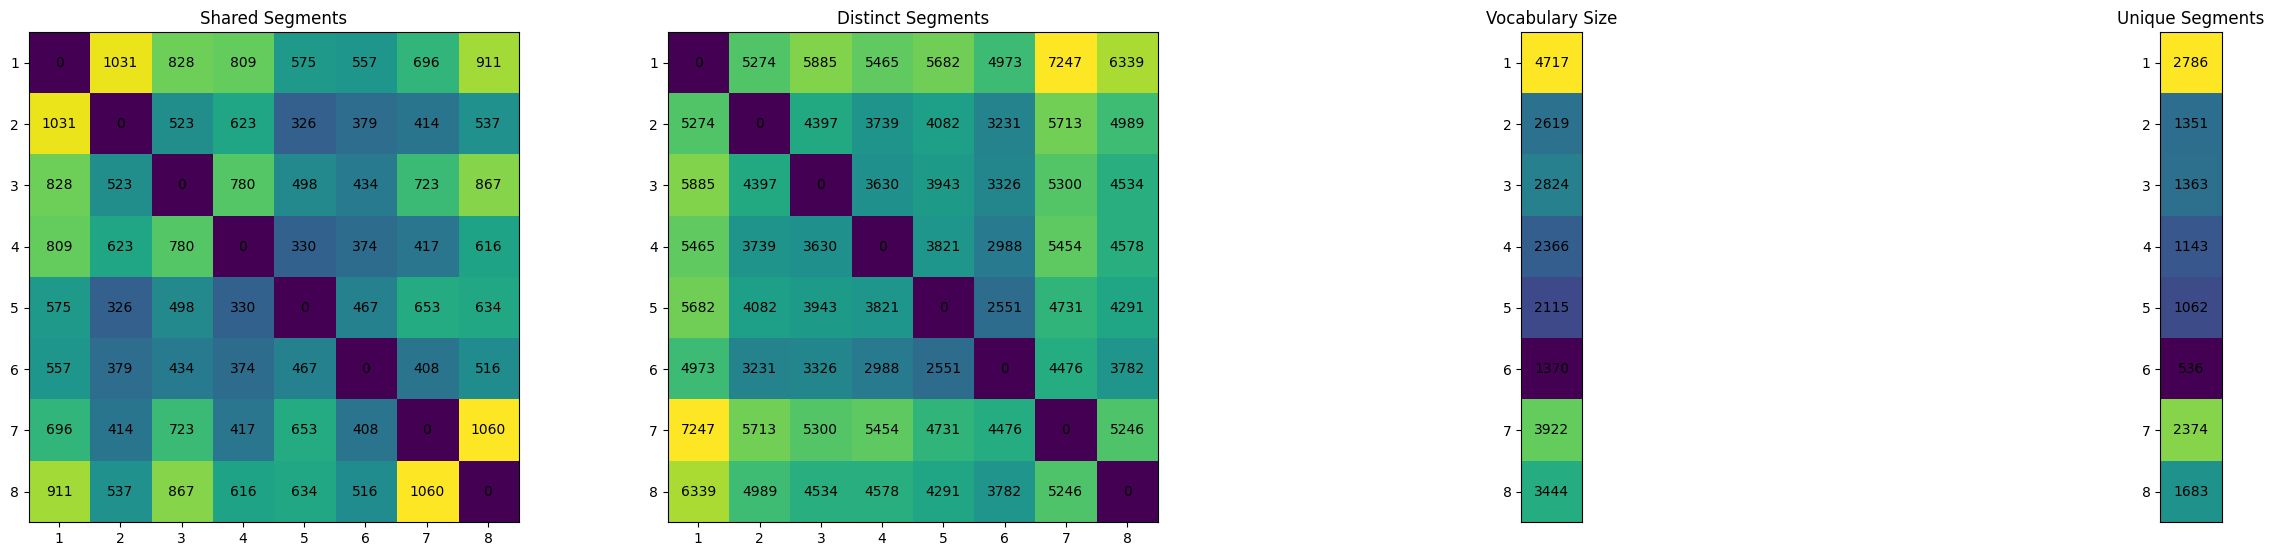

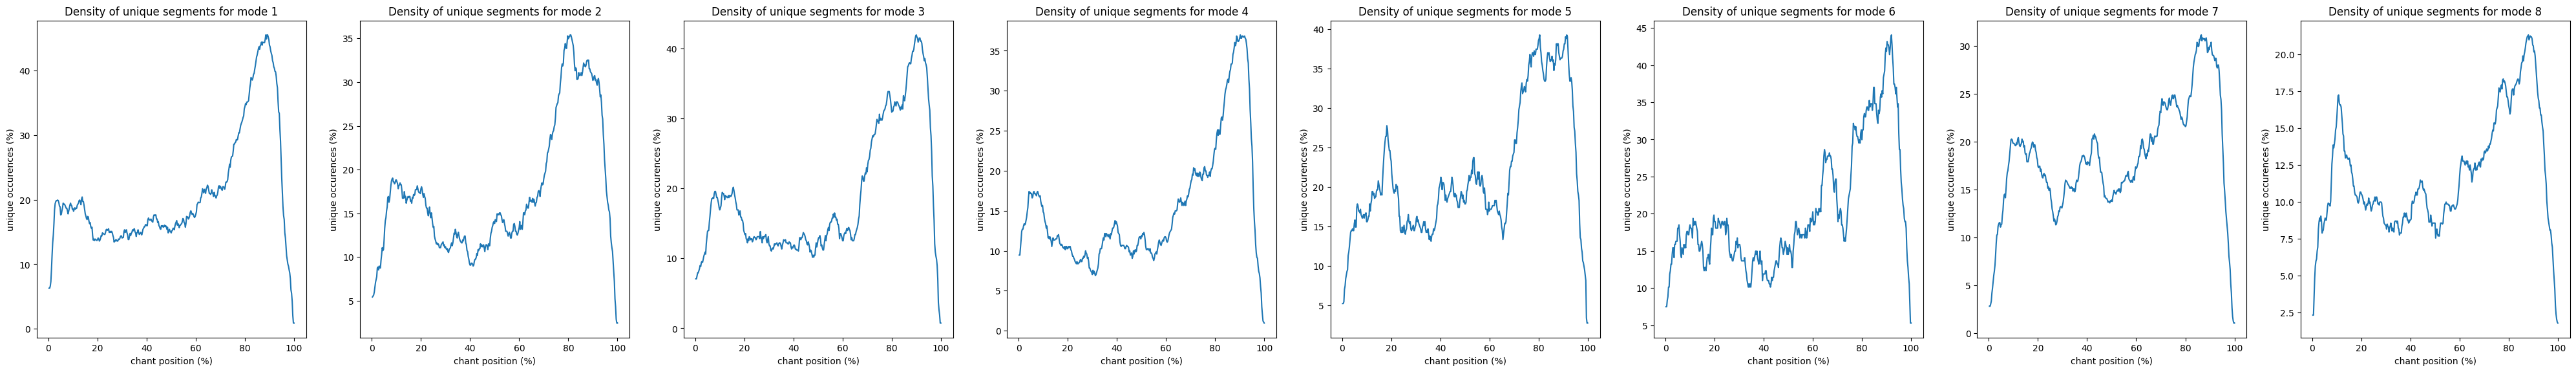

-------------------------------------------------------
------------------------------------------------------------------------


In [4]:
from src.utils.loader import prepare_dataset, load_syllable_segmentations
from src.eval.pipelines import evaluation_pipeline


# Get Data
_, y = prepare_dataset()
y_train, y_test = y[:4922].tolist(), y[4922:].tolist()
word_segmentations = load_syllable_segmentations()
train_segmentation, test_segmentation = word_segmentations[:4922], word_segmentations[4922:]
# Evaluate model
bacor_model = evaluation_pipeline(
    train_segmentation, y_train, test_segmentation, y_test,
    max_features_from_model = 100, include_additative = False, fe_occurence_coef=10)

## Random Segmentation

INFO:root:Number of chants: 7031
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:The SVC model was trained with 4922 training data and 4922 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2408 , Last feature occurences: 158
INFO:root:From model approach - reduced accuracy: 96.40%, reduced f1: 96.40%


------------------------------- Train Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 98.19%
			 f1: 98.19%

		 NB accuracy and f1
			 accuracy: 97.99%
			 f1: 97.99%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 32696 unique segments

		 Average Segment Length
			 avgerage: 4.37 tones in one segment

		 Melody Justified With Words
			 words justification: 16.51% of segments
			 segments justification: 26.37% of segments
			 average justification: 21.44% of segments

		 Weighted Top Mode Frequency
			 wtmf: 56.55% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 7.57 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.04 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


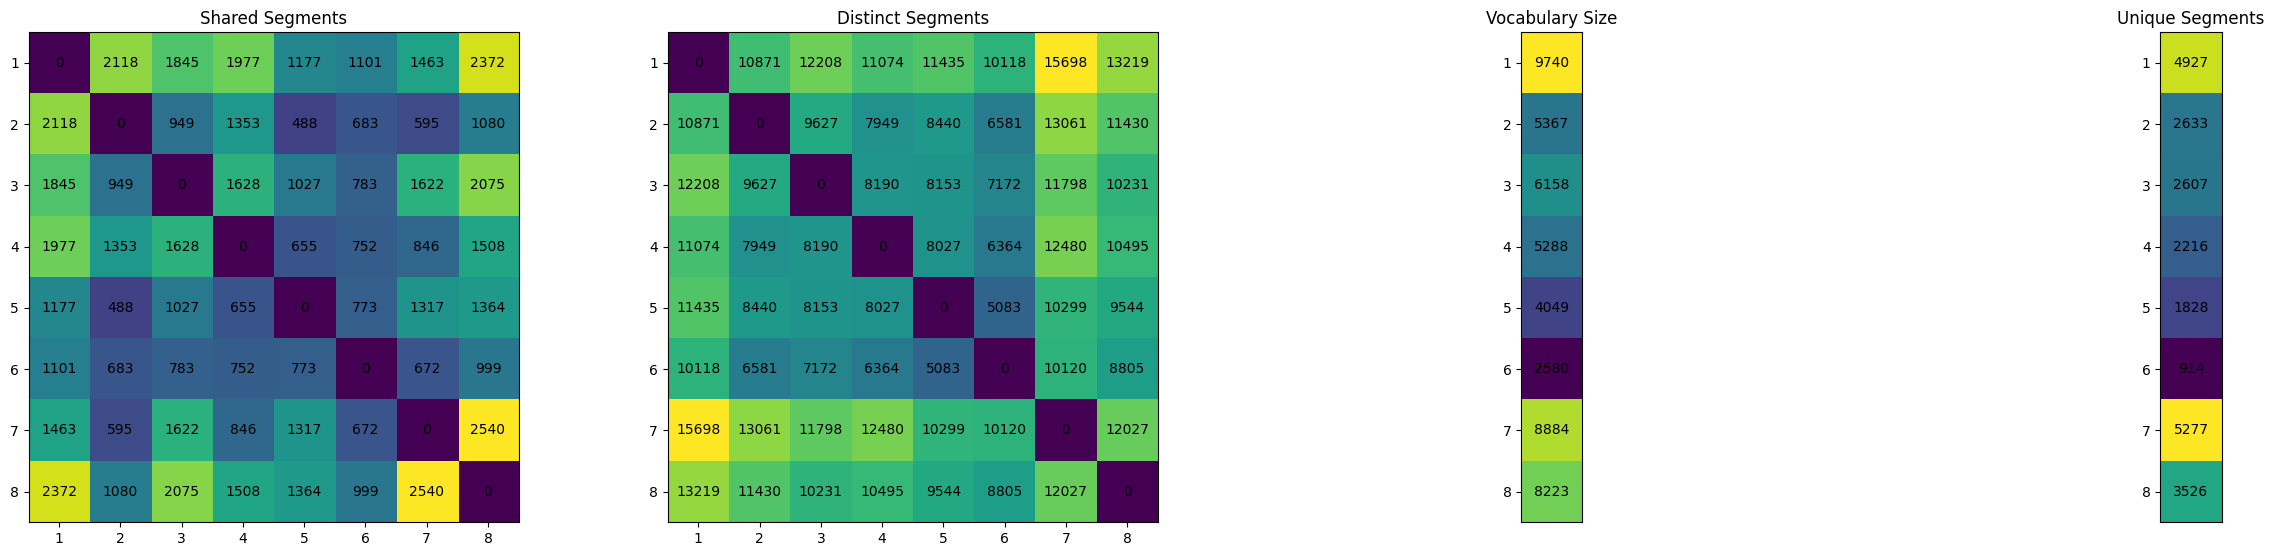

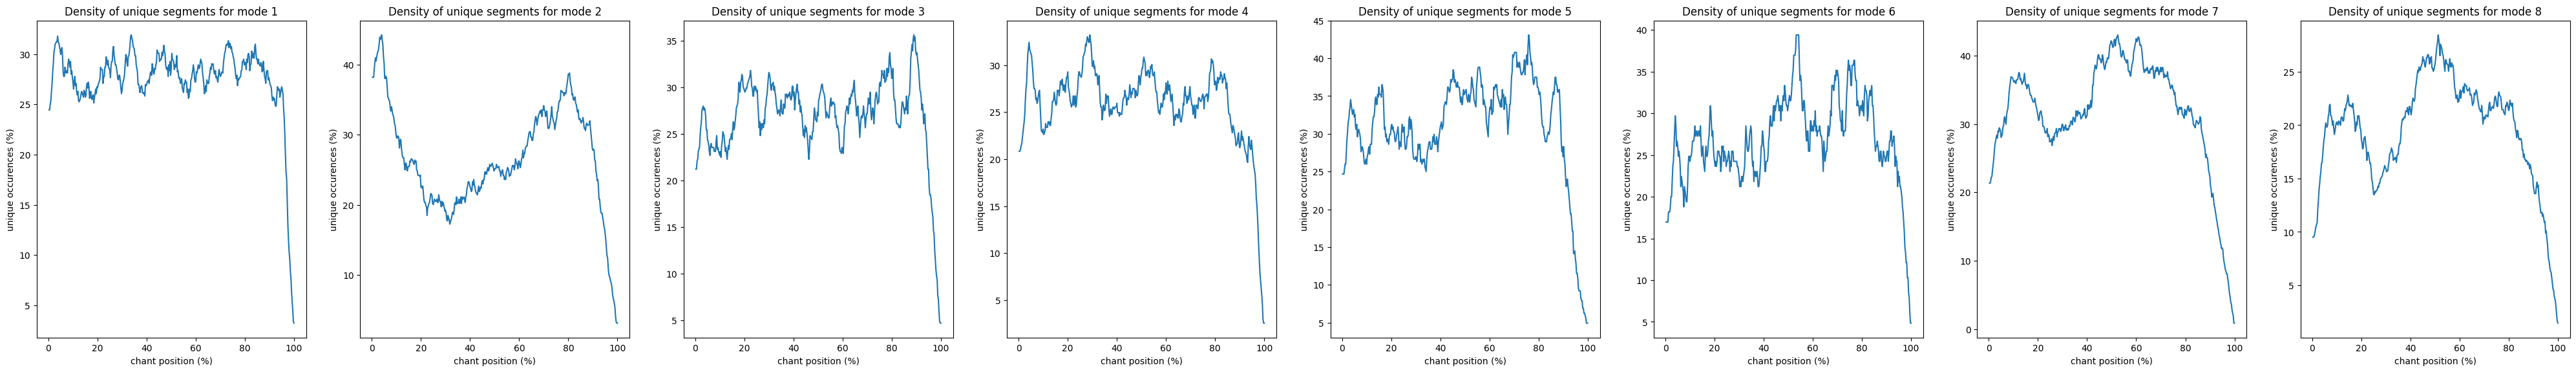

-------------------------------------------------------
--------------------------------------------------------------------------


INFO:root:The SVC model was trained with 4922 training data and 2109 testing data.
INFO:root:From model approach - Selected features: 1000 (only 1/10 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2408 , Last feature occurences: 158
INFO:root:From model approach - reduced accuracy: 74.16%, reduced f1: 73.87%


------------------------------- Test Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 80.04%
			 f1: 79.57%

		 NB accuracy and f1
			 accuracy: 76.01%
			 f1: 76.97%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 18992 unique segments

		 Average Segment Length
			 avgerage: 4.37 tones in one segment

		 Melody Justified With Phrases
			 mjww: 51.76% of segments

		 Melody Justified With Words
			 words justification: 16.46% of segments
			 segments justification: 25.99% of segments
			 average justification: 21.22% of segments

		 Weighted Top Mode Frequency
			 wtmf: 59.45% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 7.60 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 1.05 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


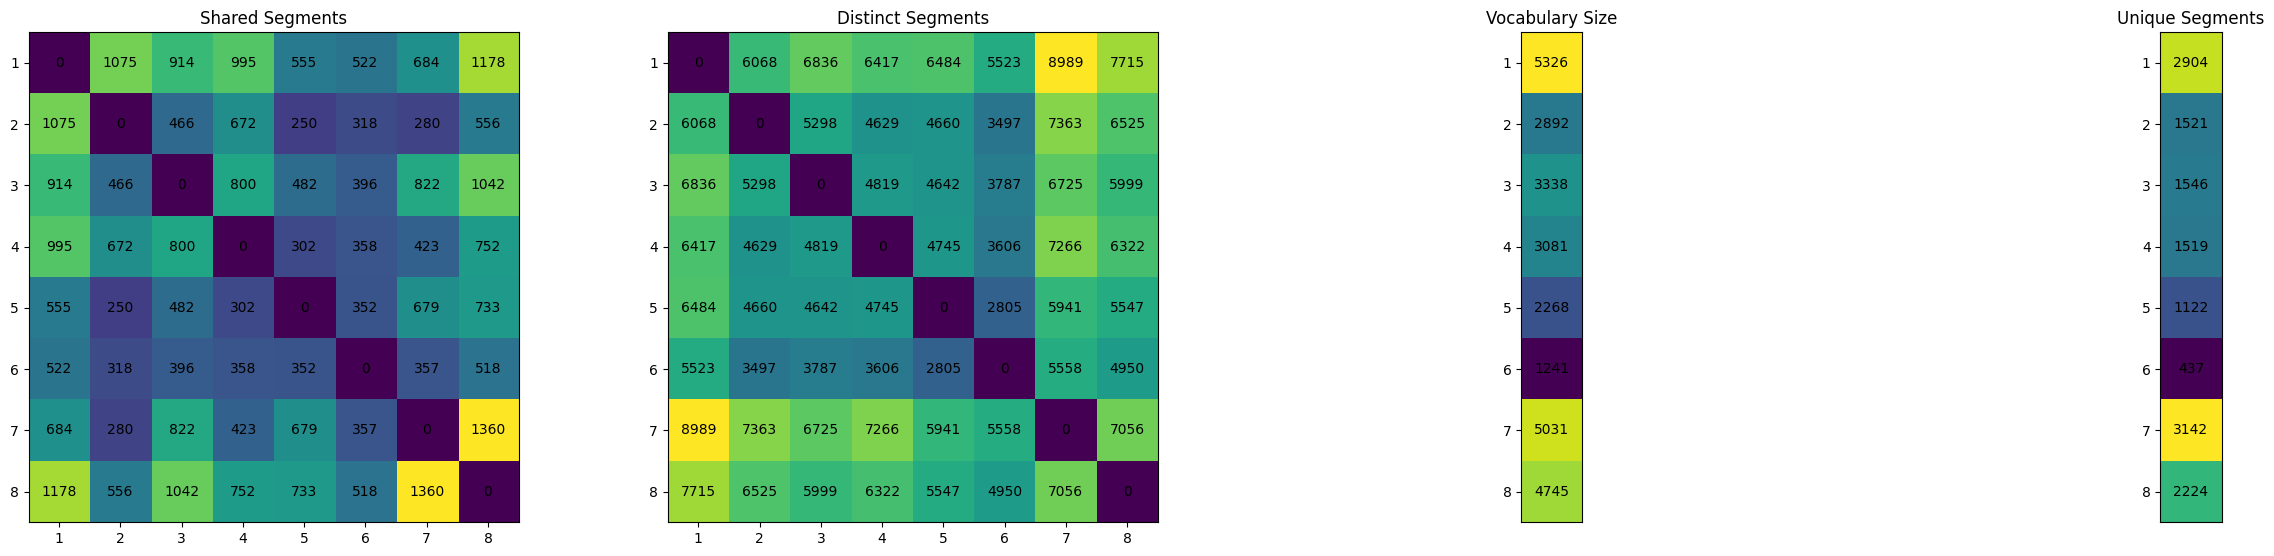

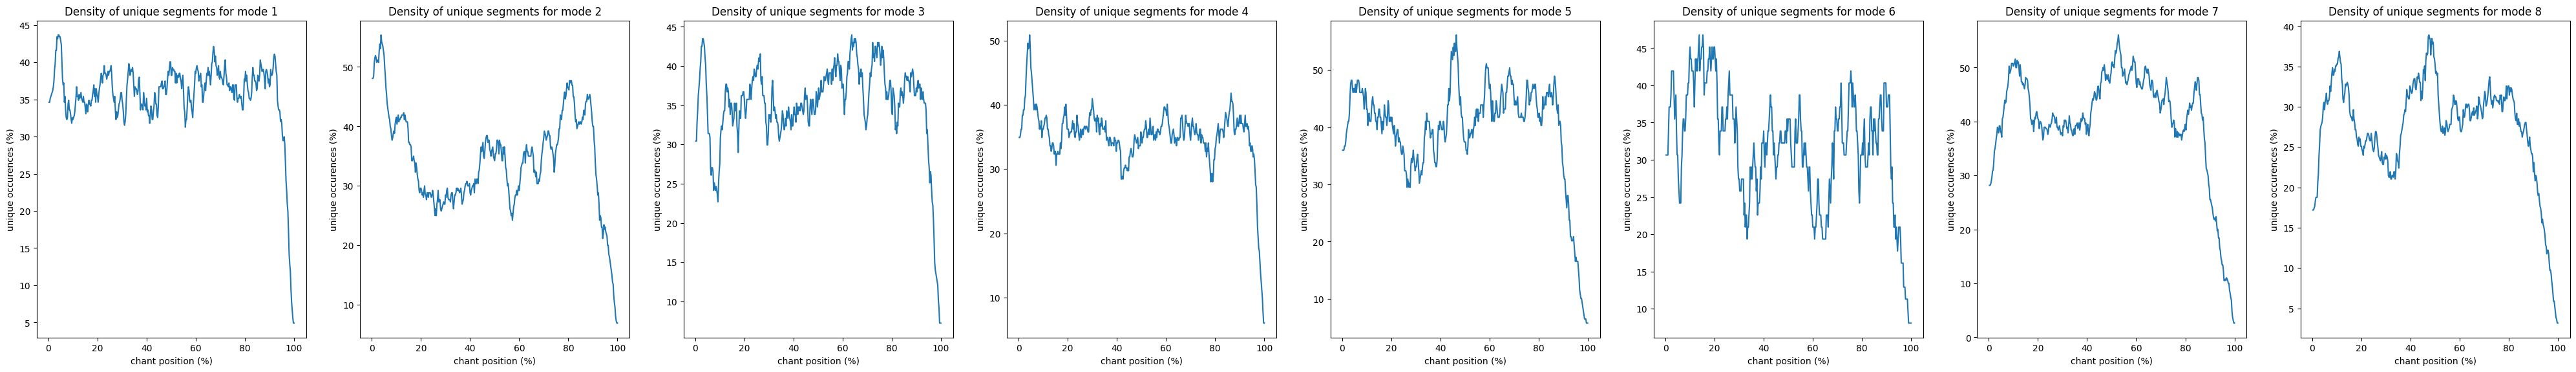

-------------------------------------------------------
--------------------------------------------------------------------------
Top selected melodies - from model: ['g', 'h', 'f', 'hg', 'k', 'gh', 'd', 'e', 'hgh', 'ghg', 'gf', 'fe', 'fg', 'gg', 'l', 'hhg', 'j', 'fed', 'ed', 'hh', 'fgh', 'hk', 'kj', 'ff', 'ef', 'gfg', 'ghhg', 'hgf', 'kjh', 'jh', 'kk', 'ghh', 'jhg', 'kl', 'fghg', 'lk', 'hgg', 'ghk', 'efed', 'ggh', 'df', 'ffe', 'fef', 'dd', 'klk', 'jk', 'ghgf', 'gff', 'hgfg', 'fgf', 'hghhg', 'hj', 'ggf', 'ghgg', 'jhgh', 'efe', 'ghgh', 'hghg', 'gfgh', 'jkjh', 'kh', 'hghh', 'kjk', 'def', 'efg', 'gfe', 'kkj', 'hjk', 'dc', 'cd', 'fgg', 'm', 'jkjhg', 'ggg', 'jkj', 'kjhgh', 'de', 'defe', 'hhgh', 'ghgfg', 'ghkh', 'dcd', 'll', 'ddf', 'hgfgh', 'hkk', 'jkl', 'kkk', 'hhh', 'hggh', 'fefg', 'fede', 'hjkj', 'fefed', 'fggf', 'lkl', 'lkk', 'hjhg', 'efd', 'ede']


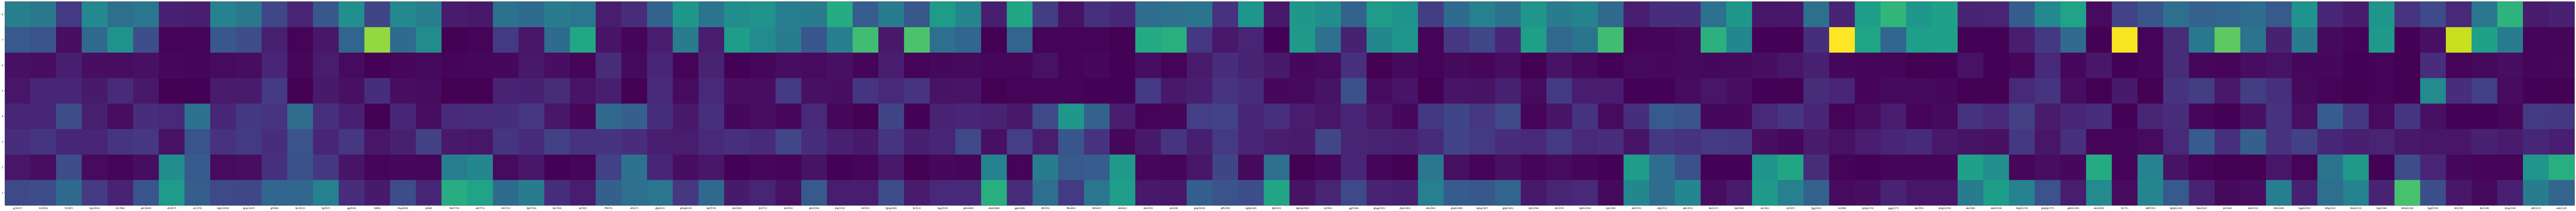

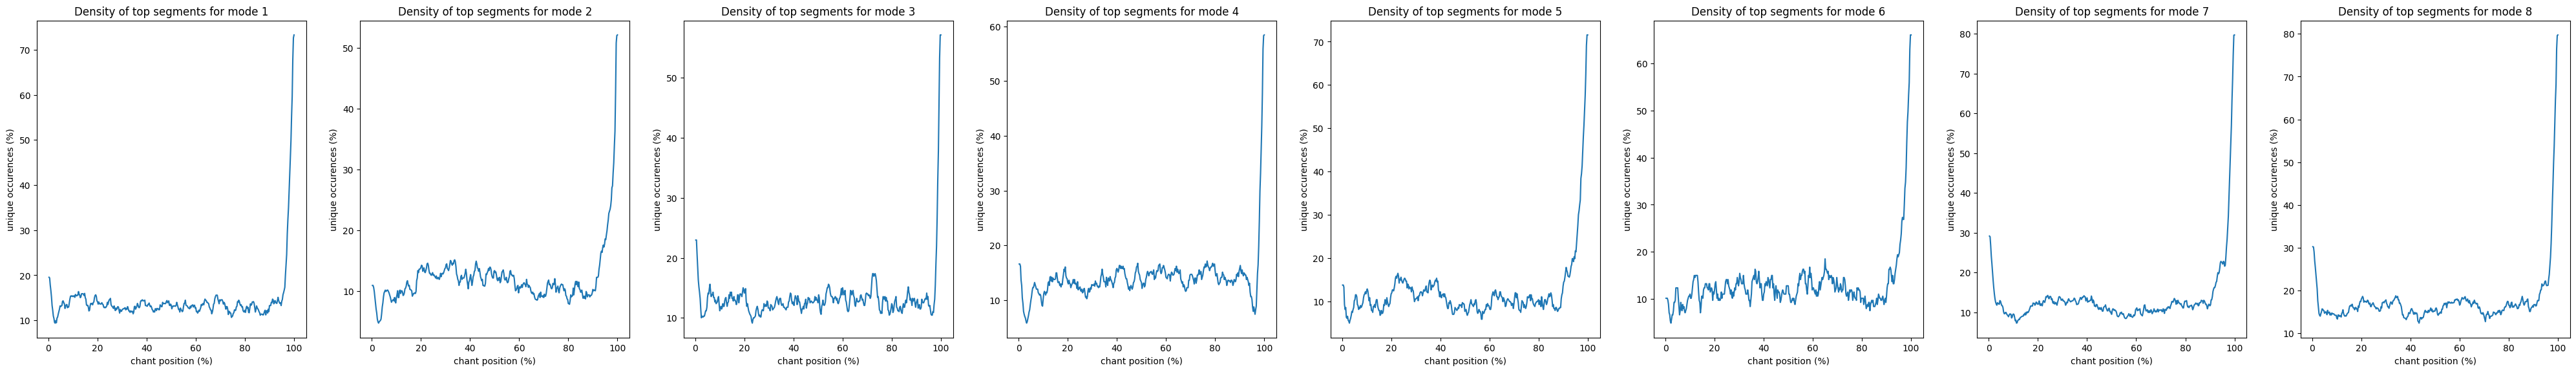



------------------------- Train + Test data charts ----------------------------
------------- Modes Vocabulary Statistics -------------


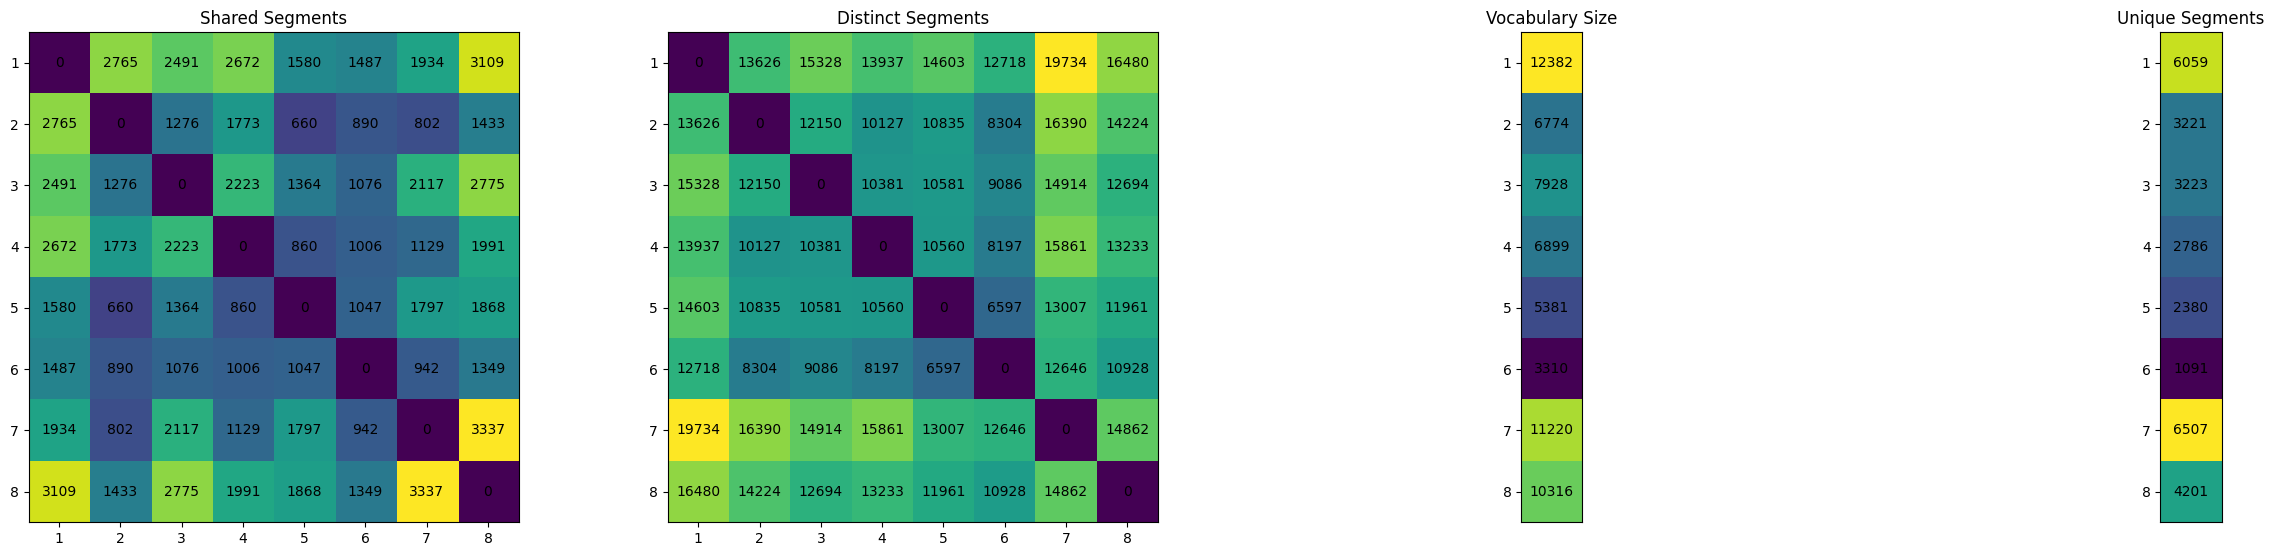

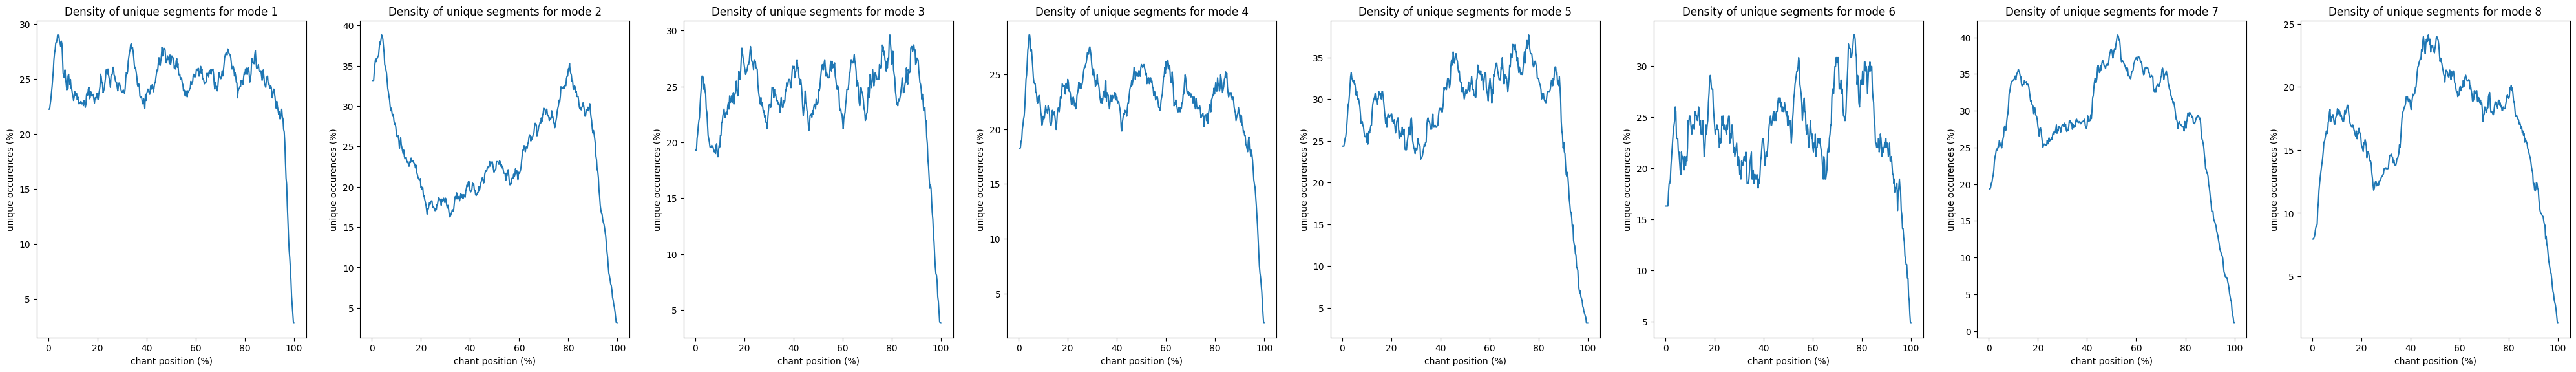

-------------------------------------------------------
------------------------------------------------------------------------


In [5]:
from src.utils.loader import prepare_dataset
from src.eval.pipelines import evaluation_pipeline
from src.models.random_model import RandomModel

# Get Data
X, y = prepare_dataset()
X_train, y_train = X[:int(0.9*4922)].tolist(), y[:int(0.9*4922)].tolist()
X_dev, y_dev = X[int(0.9*4922):4922].tolist(), y[int(0.9*4922):4922].tolist()
X_test, y_test = X[4922:].tolist(), y[4922:].tolist()
# Init model
model = RandomModel(1, 7)
# Predictions
mjwp_score = model.get_mjwp_score()
X_train = X_train+X_dev
y_train = y_train+y_dev
train_segmentation, train_perplexity = model.predict_segments(X_train)
test_segmentation, test_perplexity = model.predict_segments(X_test)

# Evaluate model
bacor_model = evaluation_pipeline(
    train_segmentation, y_train, test_segmentation, y_test, -1, -1, mjwp_score,
    max_features_from_model = 100, include_additative = False, fe_occurence_coef=10)